## Gabor filtering example 1


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Gabor filter routine, to generate a Gabor filter with given parameters, output is a Gabor filter
# you can use it later if you like
#

def gabor(sigma, theta, Lambda, psi, gamma):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

In [3]:
''' 

# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)
# 2d Gabor filter for image processing, is a 2d sine wave modulated by a Gaussian envelop
# 
# -- ksize - size of gabor filter (n, n), usually it is small, e.g. 7x7 to 30x30, size of the filter
# matrix
# -- sigma - standard deviation of the gaussian function, filter bandwidth, bandwidth of that Gaussian envelop
# -- theta - orientation of the normal to the parallel stripes, we can rotate the filter, 
# direction of the 2d sine wave
# -- lambda - wavelength of the sinusoidal factor, wavelength = 1/ frequency of the filter sine wave
# -- gamma - spatial aspect ratio, 
# -- psi - phase offset, usually 0 , phase of that sine wave
# -- ktype - type and range of values that each pixel in the gabor kernel can hold,
#either 32 bit or 64 bit, float 

'''
# building the filter kernel
ksize = 21
sigma = 8.0
theta = np.pi / 2
lambd = 10
gamma = 0.5
phi = 0
g_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)

# image in gray level and convolution for 2d filtering
img = cv2.imread('images/vertical_texture.bmp',0)

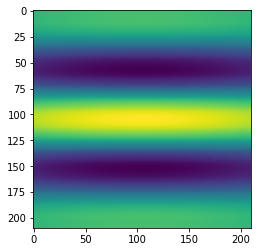

In [62]:
# making the filter larger just to show that
h, w = g_kernel.shape[:2]
g_kernel2 = cv2.resize(g_kernel, (10*w, 10*h), interpolation=cv2.INTER_CUBIC)
plt.imshow(g_kernel2)

In [4]:
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel) # CV_8UC3, 8-bit unsigned integer with 3 channels

# showing the input and filtered images
cv2.imshow('image', img)
cv2.imshow('filtered image, theta=90', filtered_img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [5]:
# building the filter kernel,, theta=0
ksize = 21
sigma = 8.0
theta = 0
lambd = 10
gamma = 0.5
phi = 0
g_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)

# image in gray level and convolution for 2d filtering
img = cv2.imread('images/vertical_texture.bmp',0)

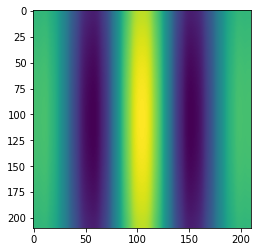

In [7]:
# making the filter larger just to show that
h, w = g_kernel.shape[:2]
g_kernel2 = cv2.resize(g_kernel, (10*w, 10*h), interpolation=cv2.INTER_CUBIC)
plt.imshow(g_kernel2)

In [8]:
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

cv2.imshow('image', img)
cv2.imshow('filtered image 2 theta=0', filtered_img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1